In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Wczytanie danych

In [2]:
df = pd.read_csv('../../clustering_R3.csv')
df.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


# Standaryzacja

In [3]:
std_scale = StandardScaler().fit(df.iloc[:,[0,1,2]])
df = pd.DataFrame(std_scale.transform(df.iloc[:,[0,1,2]]), columns=["X1", "X2", "X3"])

# Wizualizacja

<IPython.core.display.Javascript object>


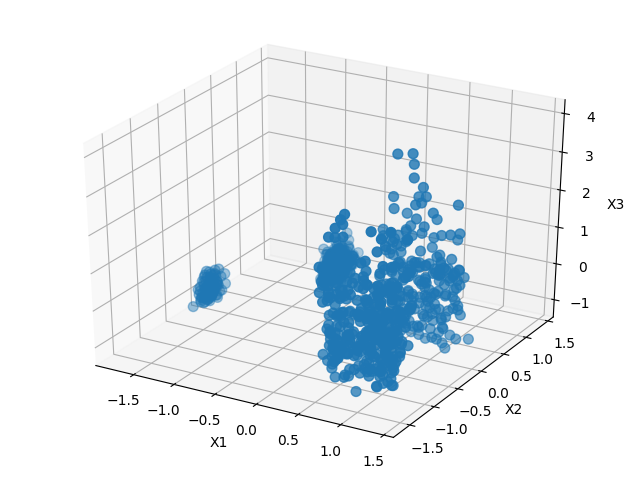

In [4]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.X1, df.X2, df.X3, s=50)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


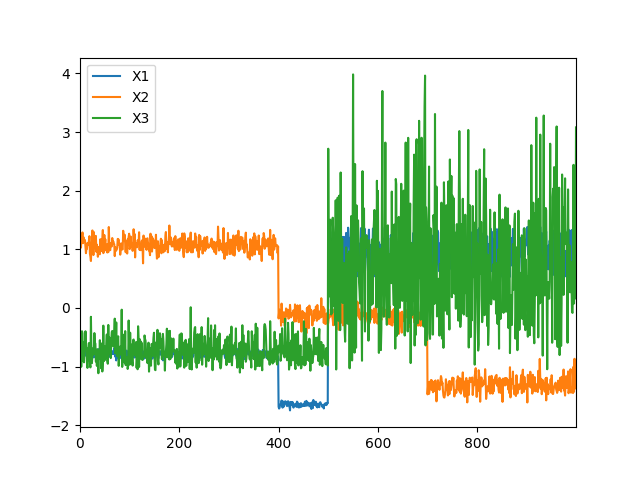

In [5]:
df.plot()

<IPython.core.display.Javascript object>


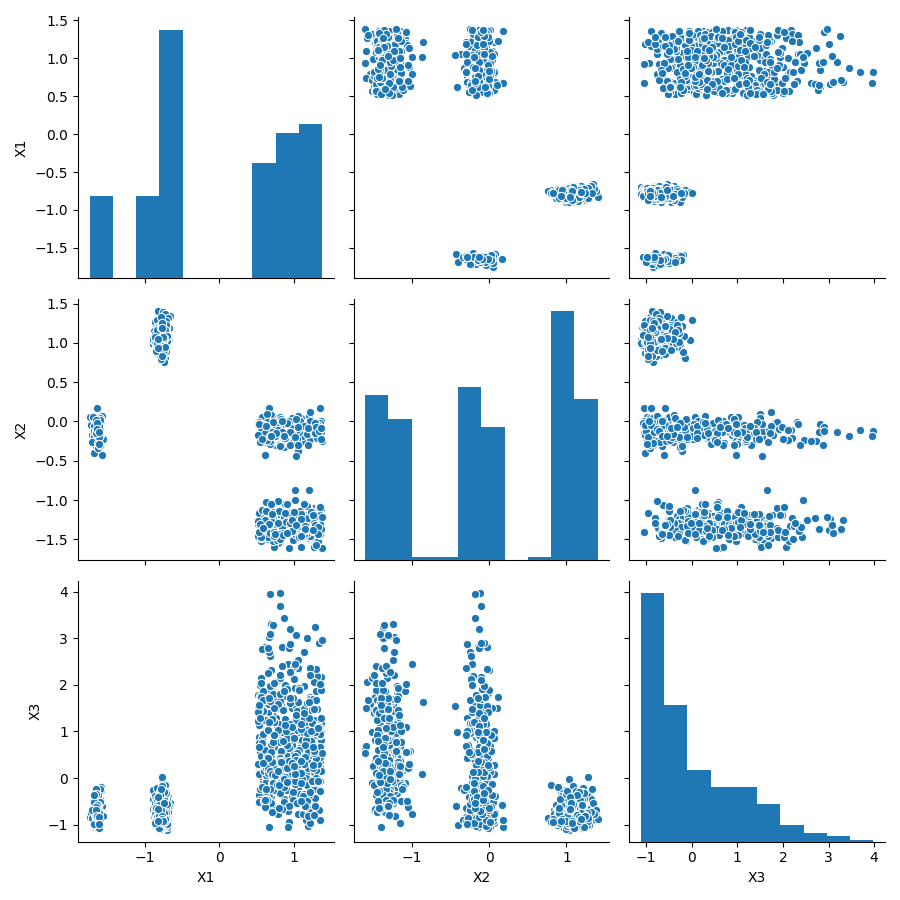

In [6]:
sns.pairplot(df, height=3)
plt.tight_layout()

# Modele
Do oceny użyjemy znanego już współczynnika Silhouette i indeks Calińskiego-Harabasza

Silhouette Score - jest średnią Silhouette Coefficient wszystkich próbek, która liczona przy użyciu odległości do najbliższego punktu w klastrze i średniej odległości do najbliższego klastra(innego niż próbka). Przyjmuje wartości z przedziału <-1,1> gdzie 1 oznacza najlepszy wynik.

Indeks Calińskiego-Harabasza - stosunek rozproszenia wewnątrz klastra do rozproszenia pomiędzy klastrami. Im niższy tym lepszy

In [37]:
%matplotlib inline
def plot_metric(score):
    plt.plot(range(2,20), score, '-o')
    plt.xlabel('number of clusters, k')
    plt.ylabel('score')
    plt.xticks(range(2,20))
    plt.show()

## KMeans

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [9]:
silscores = []
chscores = []
for i in range(2,20):
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(df)
               
    sscore = silhouette_score(df, y_pred)
    silscores.append(sscore)
    
    chscore = calinski_harabasz_score(df, y_pred)
    chscores.append(chscore)

### silhouette_score

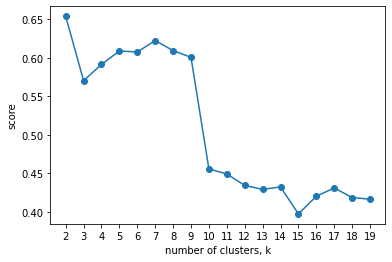

In [10]:
plot_metric(silscores)
s1 = max(silscores)

### calinski_harabasz_score

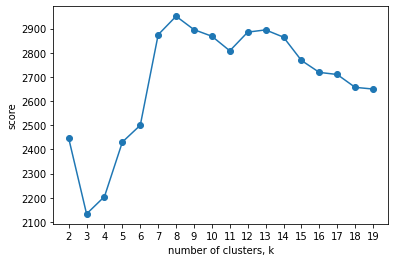

In [11]:
plot_metric(chscores)
ch1 = min(chscores)

Wg silhouette_score najlepszą liczbą klastrów jest 2, wg calinski_harabasz_score 3

<IPython.core.display.Javascript object>


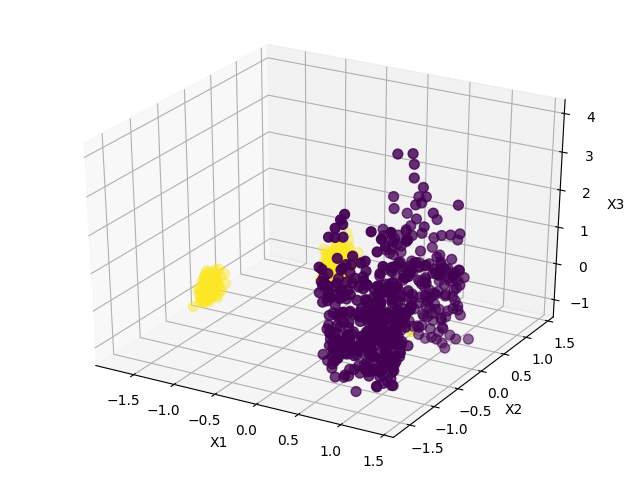

In [12]:
%matplotlib notebook
model = KMeans(n_clusters=2)
y_pred = model.fit_predict(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.X1, df.X2, df.X3, s=50, c = y_pred)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

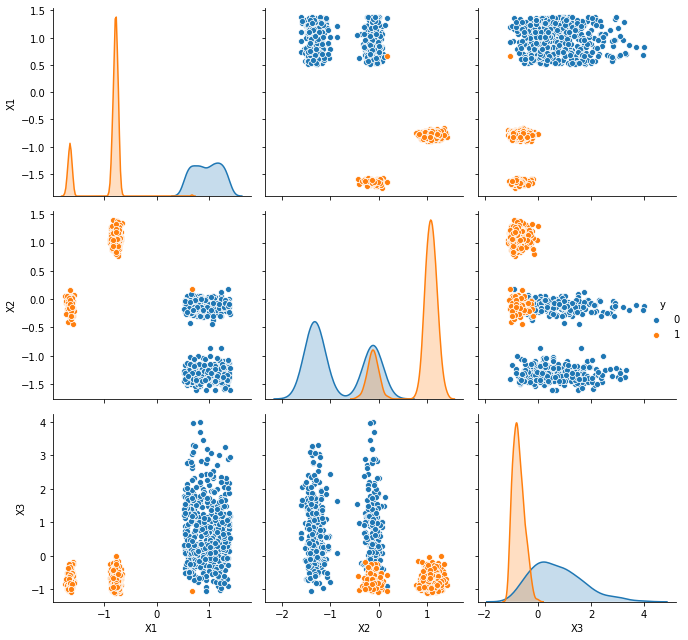

In [13]:
%matplotlib inline
df['y'] = y_pred
sns.pairplot(df, height=3, hue = 'y')
plt.tight_layout()

<IPython.core.display.Javascript object>


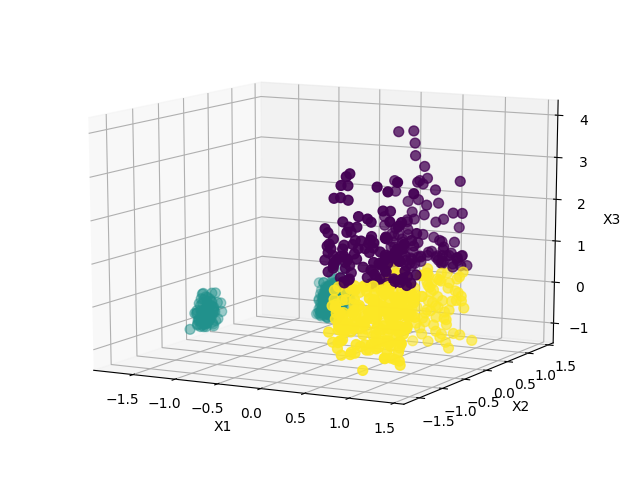

In [42]:
%matplotlib notebook
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.X1, df.X2, df.X3, s=50, c = y_pred)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

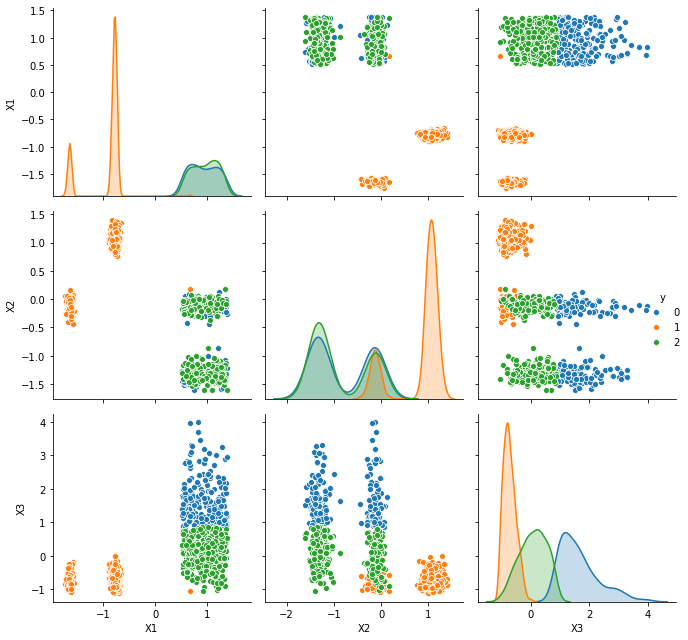

In [15]:
%matplotlib inline
df['y'] = y_pred
sns.pairplot(df, height=3, hue = 'y')
plt.tight_layout()

## AgglomerativeClustering

In [19]:
silscores = []
chscores = []
for i in range(2,20):
    model = AgglomerativeClustering(n_clusters=i)
    y_pred = model.fit_predict(df)
               
    sscore = silhouette_score(df, y_pred)
    silscores.append(sscore)
    
    chscore = calinski_harabasz_score(df, y_pred)
    chscores.append(chscore)

### silhouette_score

In [20]:
plot_metric(silscores)
s2 = max(silscores)

### calinski_harabasz_score

In [21]:
plot_metric(chscores)
ch2 = min(chscores)

Ponownie najlepiej wypadły dwa klastry

<IPython.core.display.Javascript object>


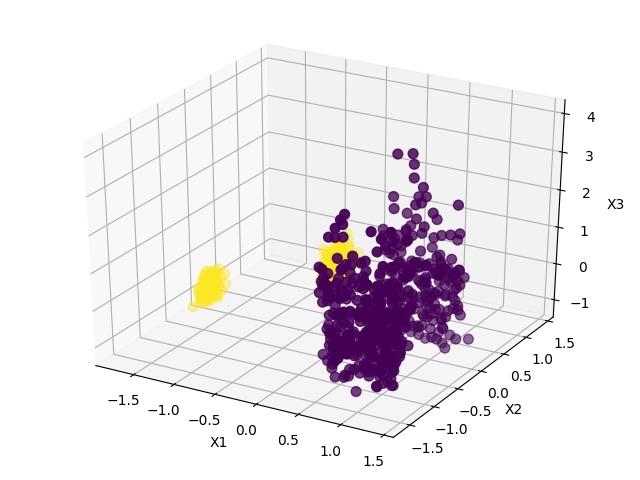

In [22]:
%matplotlib notebook
model = AgglomerativeClustering(n_clusters=2)
y_pred = model.fit_predict(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.X1, df.X2, df.X3, s=50, c = y_pred)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

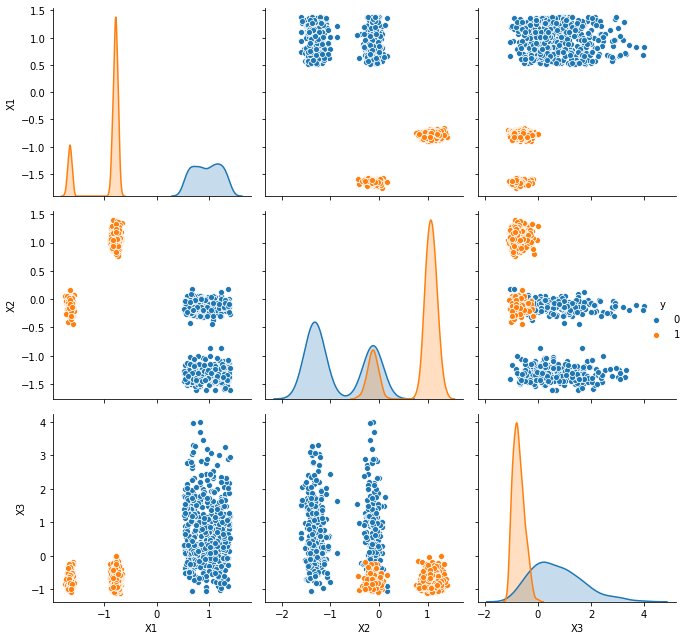

In [23]:
%matplotlib inline
df['y'] = y_pred
sns.pairplot(df, height=3, hue = 'y')
plt.tight_layout()

Podział jest sensowny dla dwóch klastrów, dla trzech niekoniecznie. 'Na oko' możnaby stwierdzić, że optymalną liczbą klastrów byłoby 4. Sprawdźmy więc jeszcze jeden algorytm

## GaussianMixture

In [24]:
from sklearn.mixture import GaussianMixture

In [33]:
silscores = []
chscores = []
for i in range(2,20):
    model = GaussianMixture(n_components=i)
    y_pred = model.fit_predict(df)
               
    sscore = silhouette_score(df, y_pred)
    silscores.append(sscore)
    
    chscore = calinski_harabasz_score(df, y_pred)
    chscores.append(chscore)

### silhouette_score

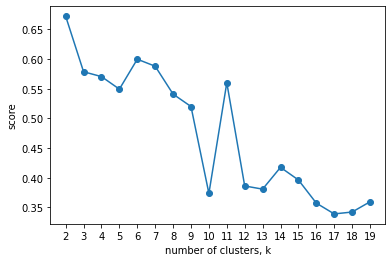

In [38]:
plot_metric(silscores)
s3 = max(silscores)

### calinski_harabasz_score

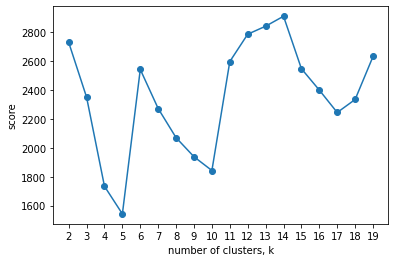

In [39]:
plot_metric(chscores)
ch3 = min(chscores)

Wg silhouette_score najlepszą liczbą klastrów nadal jest 2, wg calinski_harabasz_score przeskoczyło już na 5 klastrów.

<IPython.core.display.Javascript object>


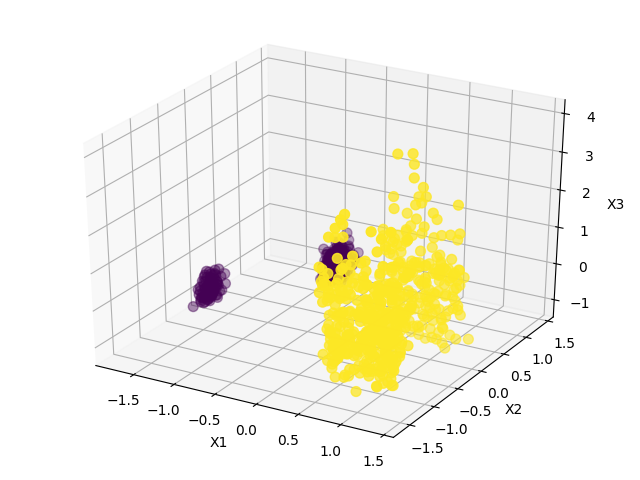

In [28]:
%matplotlib notebook
model = GaussianMixture(n_components=2)
y_pred = model.fit_predict(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.X1, df.X2, df.X3, s=50, c = y_pred)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

Przy 2 klastrach podział taki sam jak wcześniej - zobaczmy 5

<IPython.core.display.Javascript object>


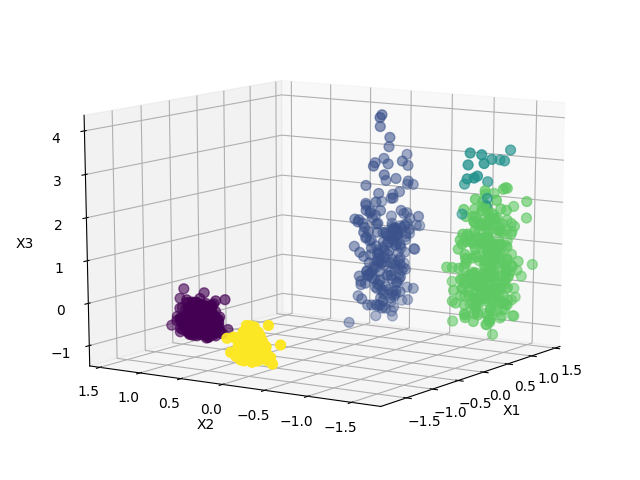

In [40]:
%matplotlib notebook
model = GaussianMixture(n_components=5)
y_pred = model.fit_predict(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.X1, df.X2, df.X3, s=50, c = y_pred)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

# Wnioski odnośnie wartości metryk i modeli

In [41]:
wyniki = pd.DataFrame({'Silhouette': [s1,s2,s3], 'C-H': [ch1, ch2,ch3]})
wyniki.rename(index={0: "KMeans", 1: "Agglomerative", 2: "GaussianMatrix"})

,Silhouette,C-H
KMeans,0.653826,2205.005027
Agglomerative,0.696548,1577.382367
GaussianMatrix,0.672148,1542.401589


Metryki nie wskazują jednoznacznie zwycięzcy, ale zdecydowanie wskazują trzecie miejsce - KMeans.
Dla AgglomerativeClustering wg metryki obu metryk powinno wybrać się 2 klastry. Przy GaussianMatrix jest to 2 lub 5 odpowiednio wg Silhouette i C-H.

Dla całego zbioru wybrałabym dwa klastry ze względu na to, iż koniec końców to wskazywała większość metryk. Co ciekawe, żadna z metryk nie wskazała liczby klastrów 4 - czego spodziewałabym się po zwizualizowaniu zbioru.

# Oświadczenie


Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego, została wykonana przeze mnie samodzielnie. Hanna Zdulska